In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




# 1. Load the dataset into python environment


In [3]:
df = pd.read_csv('/content/titanic_dataset.csv')

# 2. Make ‘PassengerId’ as the index column

In [46]:
dF = df.set_index('PassengerId')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 4. Fill in all the missing values present in all the columns in the dataset

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

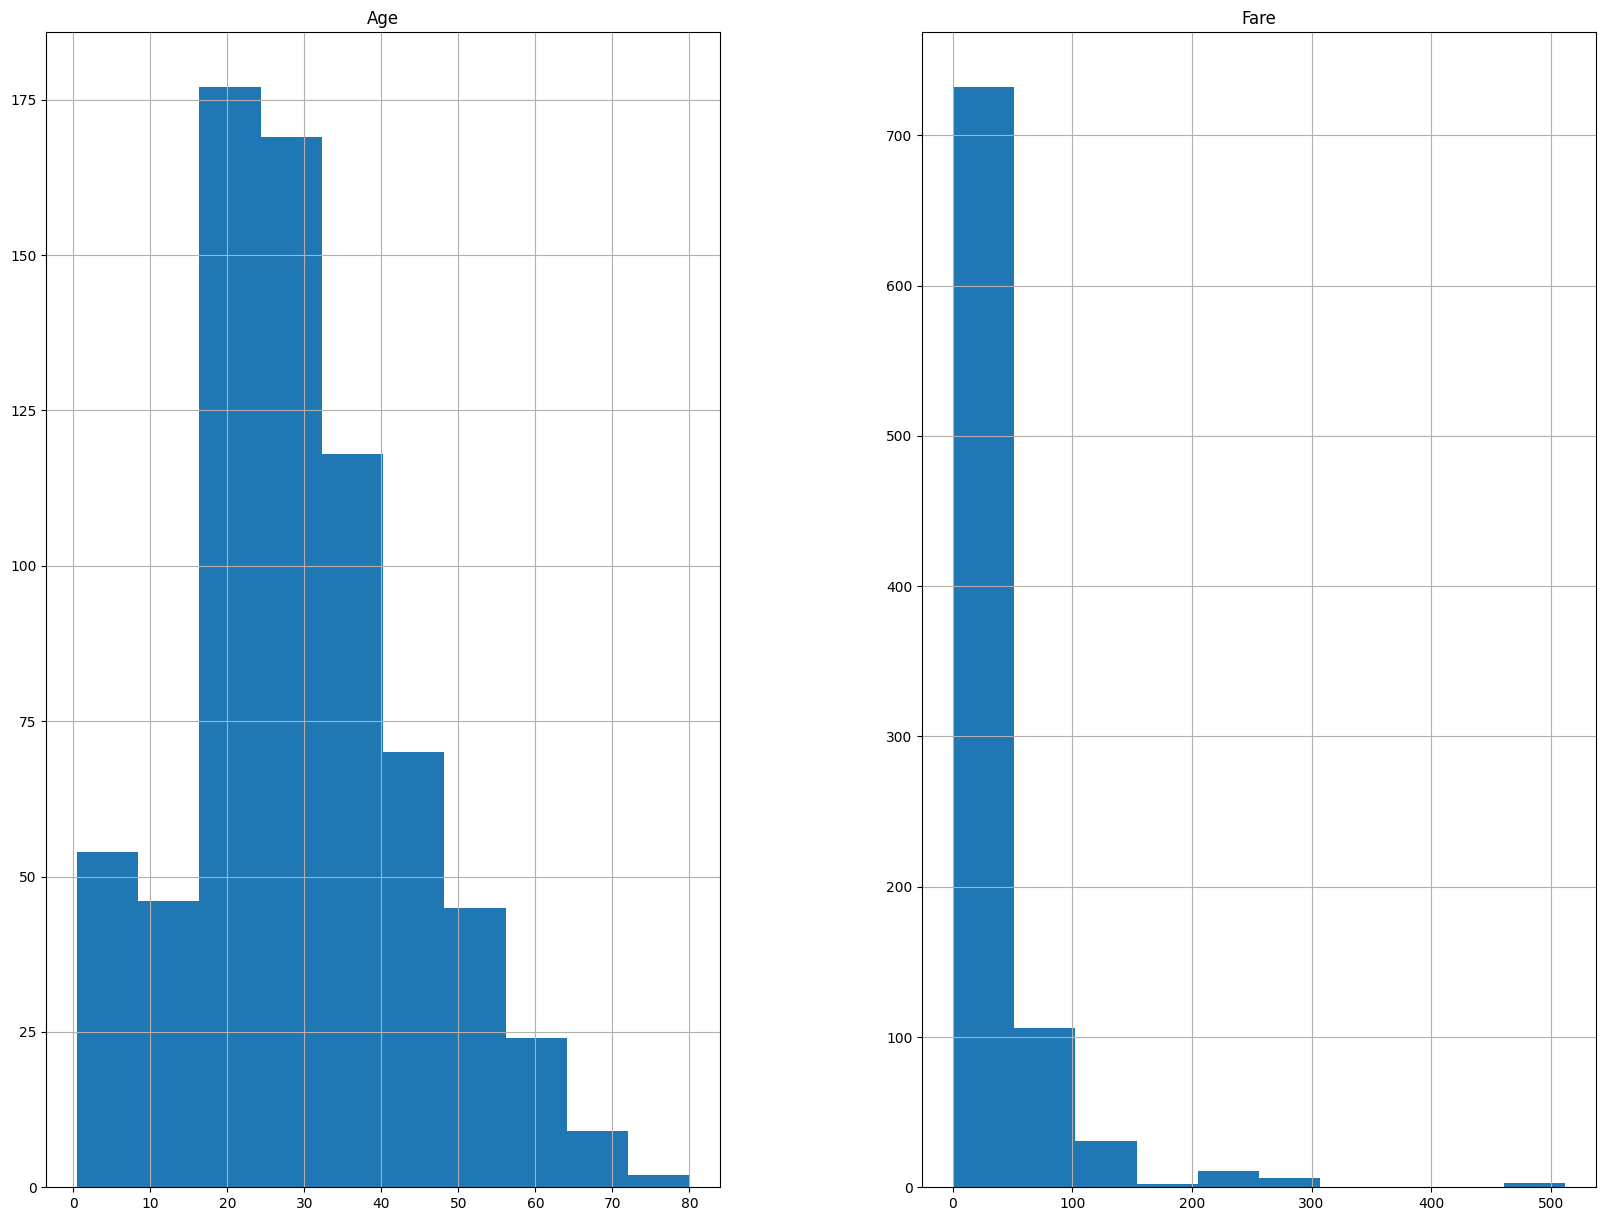

In [ ]:
freq_graph = df.select_dtypes(include='float64')
freq_graph.hist(figsize=(20, 15))

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].value_counts().max)
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].value_counts().index[0])

In [ ]:
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
num_columns=['Fare', 'Pclass', 'Parch']

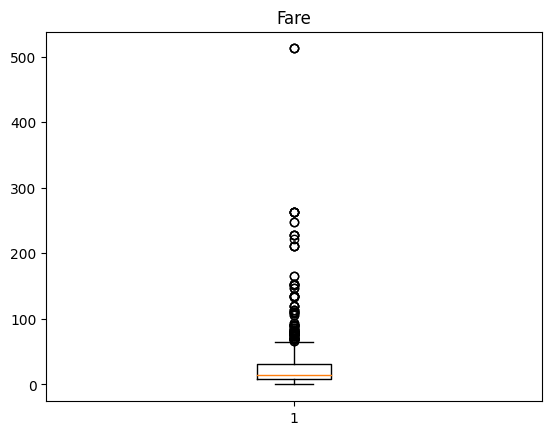

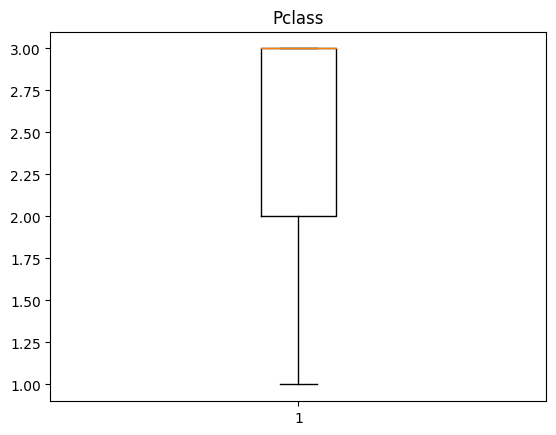

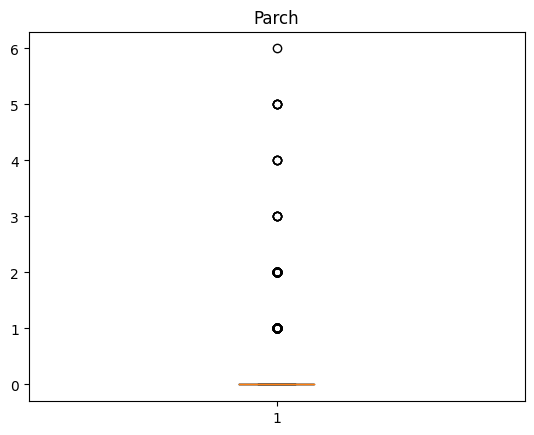

In [ ]:
for i in num_columns:
    plt.figure()

    plt.boxplot(df[i])

    plt.title(i)

In [ ]:
Q1=np.percentile(df['Fare'],25,method='midpoint')
Q2=np.percentile(df['Fare'],50,method='midpoint')
Q3=np.percentile(df['Fare'],75,method='midpoint')
print('Q1 is:', Q1)
print('Q2 is:', Q2)
print('Q3 is:', Q3)

Q1 is: 7.9104
Q2 is: 14.4542
Q3 is: 31.0


In [ ]:
IQR =Q3-Q1
print(IQR)

23.0896


In [51]:
lower_lim=Q1-1.5*IQR
UP_lim=Q3+1.5*IQR

In [ ]:
print('lower whisker is', lower_lim)
print('upper whisker is',UP_lim)

lower whisker is -26.724
upper whisker is 65.6344


In [59]:
outlier=[]
for X in df['Fare']:
  if((X< lower_lim)or(X> UP_lim)):
    outlier.append(X)
    print(outlier)

[7.25]
[7.25, 71.2833]
[7.25, 71.2833, 7.925]
[7.25, 71.2833, 7.925, 53.1]
[7.25, 71.2833, 7.925, 53.1, 8.05]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 8.05]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 8.05, 31.275]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 8.05, 31.275, 7.8542]
[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 8.05, 3

In [ ]:
df['Fare']=df['Fare'].clip(lower=lower_lim,upper=UP_lim)

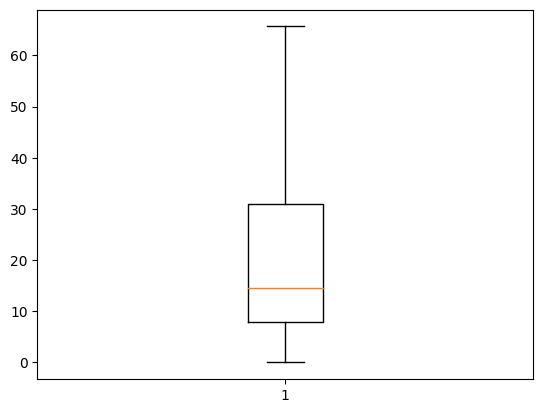

In [ ]:
plt.boxplot(df['Fare'])
plt.show();

In [ ]:
from scipy.stats import zscore
z_score = zscore(df['Pclass'])
print(z_score)

0      0.827377
1     -1.566107
2      0.827377
3     -1.566107
4      0.827377
         ...   
886   -0.369365
887   -1.566107
888    0.827377
889   -1.566107
890    0.827377
Name: Pclass, Length: 891, dtype: float64


In [ ]:
threshold =3
outlier_index = df.index[(z_score>threshold)|(z_score<-threshold)]
print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [ ]:
df1=df.drop(outlier_index)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [ ]:
df1.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
Q1=np.percentile(df['Parch'],25,method='midpoint')
Q2=np.percentile(df['Parch'],50,method='midpoint')
Q3=np.percentile(df['Parch'],75,method='midpoint')
print('Q1 is:', Q1)
print('Q2 is:', Q2)
print('Q3 is:', Q3)


Q1 is: 0.0
Q2 is: 0.0
Q3 is: 0.0


In [48]:
IQR =Q3-Q1
print(IQR)


0.0


In [53]:
lower_lim=Q1-1.5*IQR
UP_lim=Q3+1.5*IQR

In [54]:
print('lower whisker is', lower_lim)
print('upper whisker is',UP_lim)


lower whisker is 0.0
upper whisker is 0.0


In [58]:
outlier=[]
for X in df['Parch']:
  if((X< lower_lim)or(X> UP_lim)):
    outlier.append(X)
    print(outlier)

In [56]:
df['Parch']=df['Parch'].clip(lower=lower_lim,upper=UP_lim)

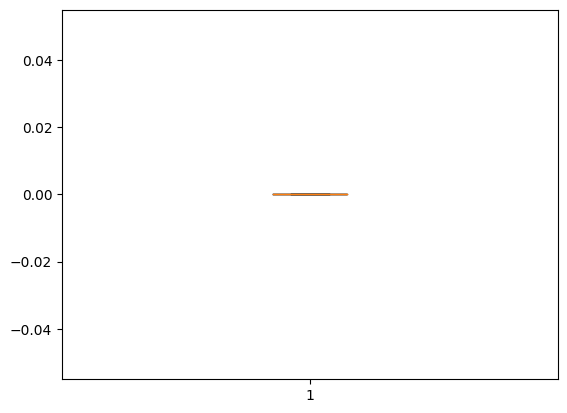

In [60]:
plt.boxplot(df['Parch'])
plt.show();

Q!# 6)Do min max scaling on the feature set (Take ‘Survived’ as target)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
X=df

In [11]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
data = pd.read_csv('/content/titanic_dataset.csv')


In [24]:
from sklearn.preprocessing import StandardScaler

In [28]:
X=data.drop([],axis=1)

In [29]:
sc = StandardScaler()

In [31]:
X = X.select_dtypes(include=['int64', 'float64'])

In [32]:
 X_sc = sc.fit_transform(X)

In [33]:
X_sc=pd.DataFrame(X_sc)

In [36]:
X_sc.describe()

,0,1,2,3,4,5,6
count,8.910000e+02,8.910000e+02,8.910000e+02,7.140000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,6.379733e-17,3.987333e-17,-8.772133e-17,2.388379e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000701e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.730108e+00,-7.892723e-01,-1.566107e+00,-2.016979e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,-8.650540e-01,-7.892723e-01,-3.693648e-01,-6.595416e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,0.000000e+00,-7.892723e-01,8.273772e-01,-1.170488e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,8.650540e-01,1.266990e+00,8.273772e-01,5.718310e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,1.730108e+00,1.266990e+00,8.273772e-01,3.465126e+00,6.784163e+00,6.974147e+00,9.667167e+00


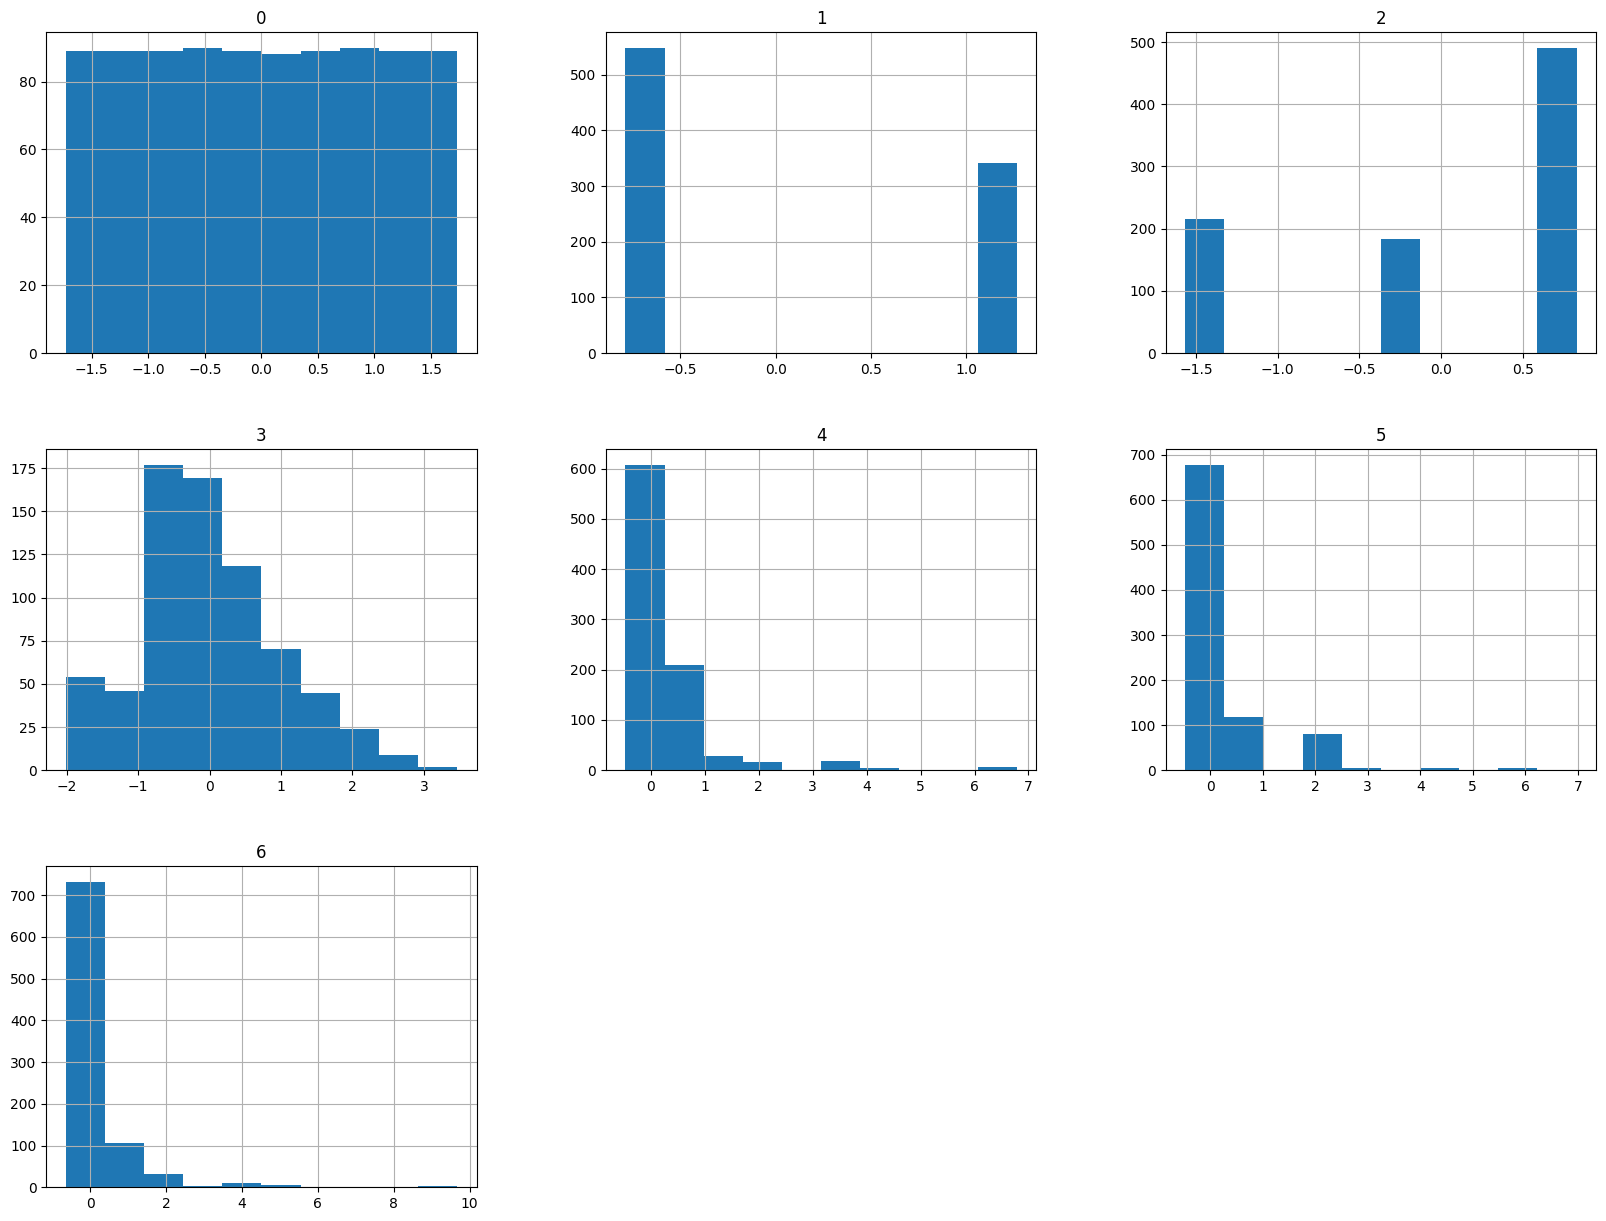

In [37]:
X_sc.hist(figsize=(20,15))
plt.show()

In [34]:
import sklearn
minmax = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))

In [38]:
X_mm = minmax.fit_transform(X)

In [40]:
X_mm = pd.DataFrame(X_mm)

In [42]:
X_mm.describe()

,0,1,2,3,4,5,6
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.289162,0.486592,0.418036,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.247612,0.000000,0.000000,0.015440
50%,0.500000,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,0.750000,1.000000,1.000000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


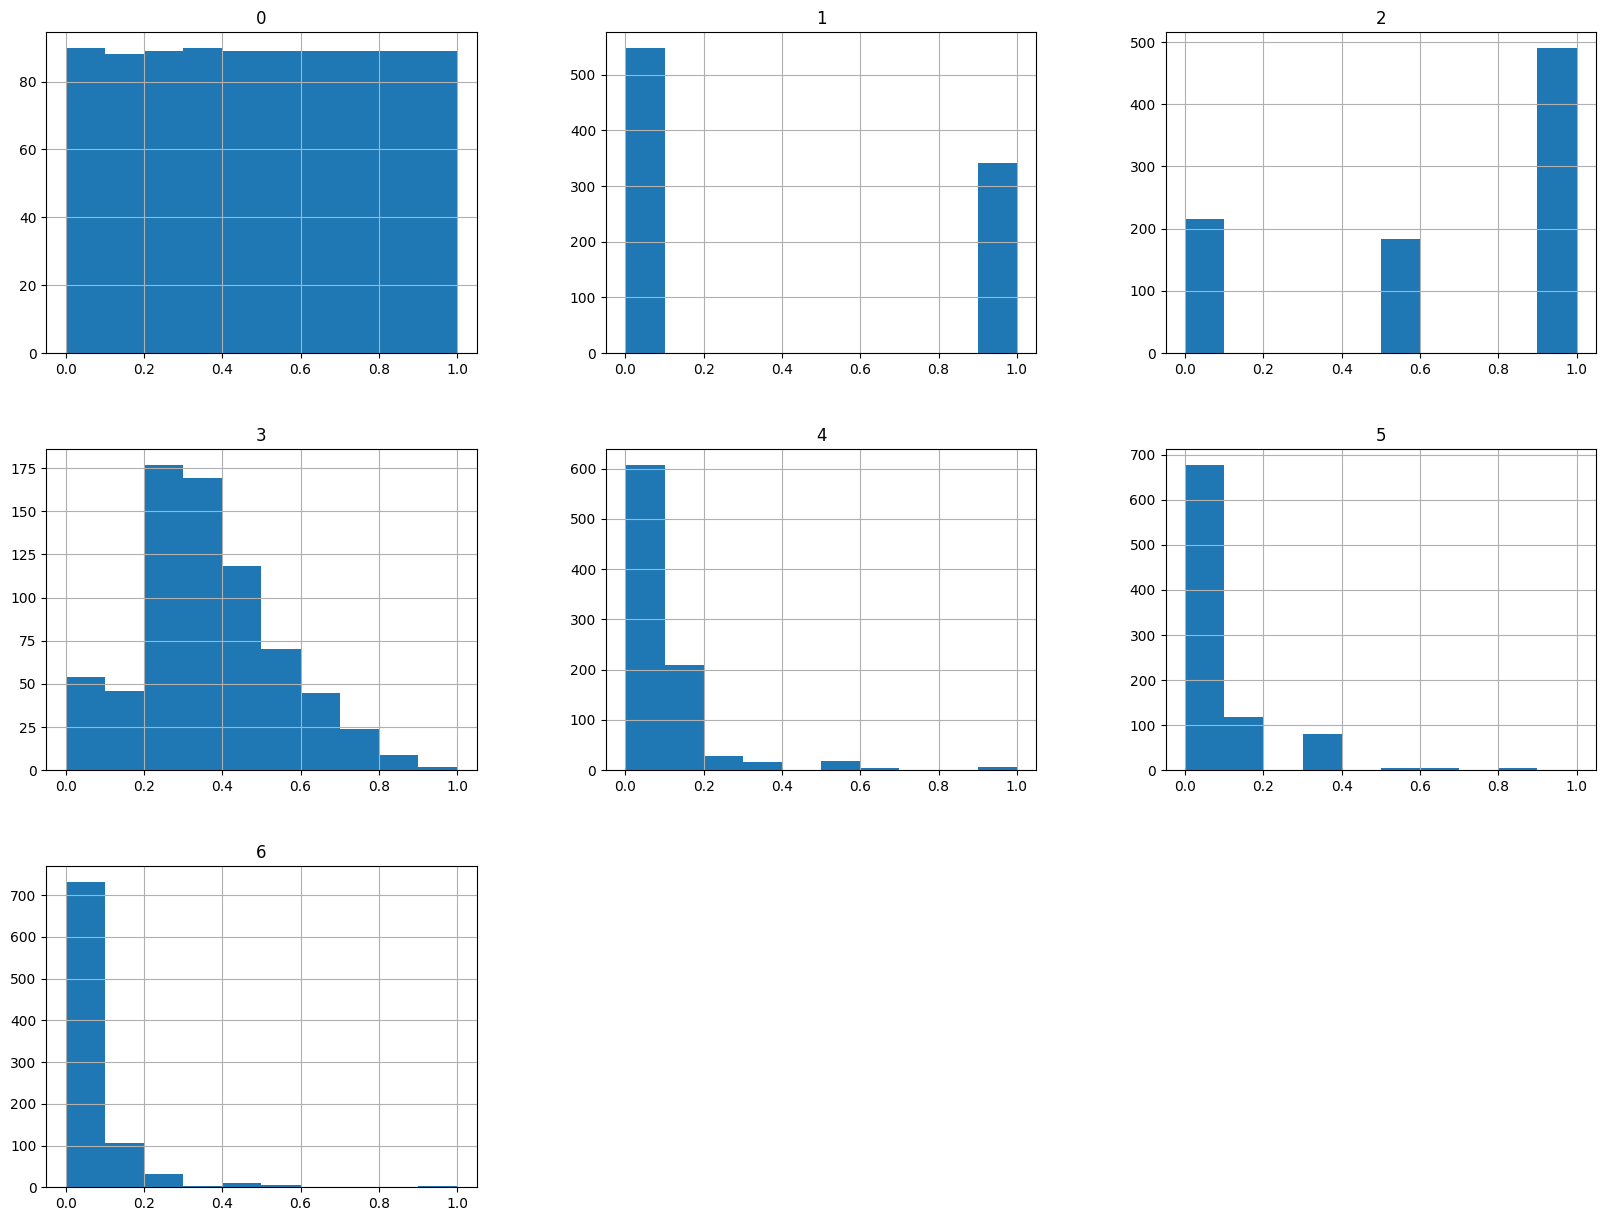

In [43]:
X_mm.hist(figsize=(20,15))
plt.show()